# Grupo 21: Thiago e Gabriele

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import preprocessing

## Integração dos dados

1. Juntar os arquivos, utilizando o concat e ignorando os índices;
2. Passar as variáveis para numérico;
3. Retirar linhas que possuem mais de 3 valores nulos;
4. Retirar a coluna de lançamento e as linhas duplicadas.

In [3]:
dados1 = pd.read_csv( "trabalho2_dados_21.csv")
dados2 = pd.read_csv("trabalho3_dados_adicionais_21.csv")
df = pd.concat([dados1,dados2], ignore_index=True) #ignore_index é pra gerar novos indices para o dataframe resultante

Informações básicas do dataset do trabalho 2.

In [4]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                1632 non-null   object 
 1   plataforma          1632 non-null   object 
 2   genero              1632 non-null   object 
 3   editora             1630 non-null   object 
 4   vendas              1632 non-null   float64
 5   lancamento          1137 non-null   object 
 6   avaliacao-criticos  916 non-null    float64
 7   numero-criticos     916 non-null    float64
 8   avaliacao-usuarios  1112 non-null   object 
 9   numero-usuarios     851 non-null    float64
 10  fabricante          1128 non-null   object 
dtypes: float64(4), object(7)
memory usage: 140.4+ KB


Informações básicas do dataset adicional.

In [5]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                1564 non-null   object 
 1   plataforma          1564 non-null   object 
 2   genero              1564 non-null   object 
 3   editora             1562 non-null   object 
 4   vendas              1564 non-null   float64
 5   lancamento          1353 non-null   object 
 6   avaliacao-criticos  1134 non-null   float64
 7   numero-criticos     1134 non-null   float64
 8   avaliacao-usuarios  1334 non-null   object 
 9   numero-usuarios     1093 non-null   float64
 10  fabricante          1345 non-null   object 
dtypes: float64(4), object(7)
memory usage: 134.5+ KB


Informações básicas do dataset combinado.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                3196 non-null   object 
 1   plataforma          3196 non-null   object 
 2   genero              3196 non-null   object 
 3   editora             3192 non-null   object 
 4   vendas              3196 non-null   float64
 5   lancamento          2490 non-null   object 
 6   avaliacao-criticos  2050 non-null   float64
 7   numero-criticos     2050 non-null   float64
 8   avaliacao-usuarios  2446 non-null   object 
 9   numero-usuarios     1944 non-null   float64
 10  fabricante          2473 non-null   object 
dtypes: float64(4), object(7)
memory usage: 274.8+ KB


Observer que a quantidade de valores em avaliacao-usuarios é maior que o número de usuarios. Iremos tratar essa diferença mais a frente. Outro ponto a ser destacado é a diferença em relação a quantidade de dados, iremos retirar as linhas que possuem dados faltantes nos próximos passos.

Há algumas variáveis que podem ser transformadas, de modo a permitir observar mais informações sobre as mesmas. São elas: plataforma, pois nós possuímos 9 classes diferentes e seria interessante ter essa informação, do tipo de plataforma que cada jogo foi produzido, para uma única instância; genero, pois seria interessante transformar em um valor numérico; avaliacao-usuarios, que deve ser um valor numérico.

In [7]:
df['plataforma'].unique()

array(['X360', 'Wii', 'PSP', 'PS3', 'PS4', '3DS', 'PSV', 'XOne', 'WiiU'],
      dtype=object)

Antes de passarmos para essas etapas citadas, iremos limpar os dados.

Como vamos começar a retirar os valores nulos, irei passar a coluna de avaliação dos usuários para float e substituir 'tbd' por nan.

In [8]:
df['avaliacao-usuarios'] = pd.to_numeric(df['avaliacao-usuarios'].replace('tbd',np.nan),errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                3196 non-null   object 
 1   plataforma          3196 non-null   object 
 2   genero              3196 non-null   object 
 3   editora             3192 non-null   object 
 4   vendas              3196 non-null   float64
 5   lancamento          2490 non-null   object 
 6   avaliacao-criticos  2050 non-null   float64
 7   numero-criticos     2050 non-null   float64
 8   avaliacao-usuarios  1944 non-null   float64
 9   numero-usuarios     1944 non-null   float64
 10  fabricante          2473 non-null   object 
dtypes: float64(5), object(6)
memory usage: 274.8+ KB


Ao olhar os arquivos csv, pudemos observar que as instâncias que possuem mais de 3 campos vazios, colunas, podem ser retirados do dataframe, pois estas instâncias não possuem valores de avaliação. 

In [9]:
df

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
0,Green Lantern: Rise of the Manhunters,X360,Action,Warner Bros. Interactive Entertainment,0.10,7-Jun-11,59.0,17.0,7.0,22.0,Double Helix Games
1,Kinect Sports: Season Two,X360,Sports,Microsoft Game Studios,2.18,25-Oct-11,66.0,46.0,6.3,27.0,"BigPark, Rare Ltd."
2,Brothers in Arms: Double Time,Wii,Shooter,Ubisoft,0.12,23-Sep-08,45.0,13.0,6.6,17.0,Gearbox Software
3,Steambot Chronicles: Battle Tournament,PSP,Fighting,Irem Software Engineering,0.06,30-Jun-09,54.0,14.0,6.1,7.0,Irem
4,Tiger Woods PGA Tour 07,Wii,Sports,Electronic Arts,0.46,13-Mar-07,71.0,41.0,6.9,44.0,EA Redwood Shores
...,...,...,...,...,...,...,...,...,...,...,...
3191,Port Royale 3,X360,Simulation,Kalypso Media,0.04,9-Oct-12,56.0,11.0,4.5,6.0,Kalypso
3192,Major League Baseball 2K8,PSP,Sports,Unknown,0.03,3-Mar-08,63.0,5.0,NaN,NaN,Kush Games
3193,Monster Hunter Frontier Online,PS3,Role-Playing,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
3194,Battle vs. Chess,PS3,Misc,TopWare Interactive,0.03,TBA,NaN,NaN,NaN,NaN,TopWare Interactive


In [10]:
## Retirando as instâncias que possuem mais de 3 campos sem preencher
indice = lambda x: df.iloc[x].isnull().sum()
guarda_index=[]
for i in df.index:
    if indice(i)>=3:
        guarda_index.append(i)
df.drop(guarda_index, inplace=True)

In [11]:
#retirando a coluna de datas e as linhas duplicadas
df.drop(columns='lancamento',inplace=True)
df = df.drop_duplicates()
#renomear os indices
indice_novo = [i for i in range(len(df))]
for i in range(len(df)):
    df.rename({df.index[i]:indice_novo[i]}, inplace=True,axis='index')

/home/gabic9814/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 3192
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                2425 non-null   object 
 1   plataforma          2425 non-null   object 
 2   genero              2425 non-null   object 
 3   editora             2423 non-null   object 
 4   vendas              2425 non-null   float64
 5   avaliacao-criticos  1487 non-null   float64
 6   numero-criticos     1487 non-null   float64
 7   avaliacao-usuarios  1399 non-null   float64
 8   numero-usuarios     1399 non-null   float64
 9   fabricante          1813 non-null   object 
dtypes: float64(5), object(5)
memory usage: 208.4+ KB


## Transformação dos dados

1. Criar um novo DataFrame com as colunas dos tipos de plataforma;
2. Inserir os dados neste novo DataFrame, fazendo algumas mudanças;
3. Transformar a coluna de gênero em valores numéricos;
4. Preencher as colunas dos tipos de plataformas;
5. Preencher as colunas de avaliação, utilizando média ponderada.

In [14]:
df_novo = pd.DataFrame(columns=['nome','genero','editora','vendasTotais', 'X360', 'Wii', 'PSP', 'PS3', 
                                'PS4', '3DS', 'PSV', 'XOne', 'WiiU',
                                'avaliacao_criticos_media','numero_criticos_total',
                                'avaliacao_usuarios_media','numero_usuarios_total','fabricante'], 
                       index=[i for i in range(len(df.groupby(['nome'])))])

Para preencher as colunas desse novo DataFrame, iremos agrupar os jogos pelo nome. A coluna de 'vendasTotais' irá representar a quantidade total de jogos vendidos, juntando todas as plataformas que este foi produzido. As colunas 'numero_criticos_total' e 'numero_usuarios_total' representam as quantidades totais de criticos e usuarios de um determinado jogo.

In [15]:
#iremos agrupar a análise pelo nome dos jogos
gb = df.groupby(['nome'])
#preenchendo as colunas que não precisaram ser transformadas
df_novo['nome'] = [i[0] for i in gb['nome']]
df_novo['vendasTotais'] = [i for i in gb['vendas'].sum()]
df_novo['editora'] = [i[1].iloc[0] for i in gb['editora']]
df_novo['fabricante'] = [i[1].iloc[0] for i in gb['fabricante']]
df_novo['numero_criticos_total'] = [i for i in gb['numero-criticos'].sum()]
df_novo['numero_usuarios_total'] = [i for i in gb['numero-usuarios'].sum()]

Neste passo iremos preencher o gênero dos jogos. Criamos um dicionário para passarmos as classes de gênero para valores numéricos.

In [19]:
#preenchendo genero
dic_genero = {'Action':1,'Sports':2, 'Shooter':3, 'Fighting':4, 'Role-Playing':5, 'Misc':6,
       'Strategy':7, 'Adventure':8, 'Racing':9, 'Platform':10, 'Simulation':11,
       'Puzzle':12}
def genero(c):
    var=[i[1].iloc[0] for i in gb['genero']]
    numero_corr = [dic_genero[i] for i in var]
    return numero_corr


df_novo['genero'] = gb.apply(genero)[0]

As colunas de tipos de plataformas são do tipo booleanas, ou seja, recebem o valor 1 se o jogo foi produzido para aquela plaforma e 0 caso o contrário.

In [20]:
#preeenchendo as colunas referente as plataformas
def x360(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='X360'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)

    return plataforma_corr
df_novo['X360'] = gb.apply(x360)[0]


def wii(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='Wii'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['Wii'] = gb.apply(wii)[0]

def psp(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='PSP'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['PSP'] = gb.apply(psp)[0]

def ps3(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='PS3'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['PS3'] = gb.apply(ps3)[0]


def ps4(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='PS4'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['PS4'] = gb.apply(ps4)[0]

def ds3(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='3DS'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['3DS'] = gb.apply(ds3)[0]


def psv(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='PSV'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['PSV'] = gb.apply(psv)[0]

def xone(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='XOne'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['XOne'] = gb.apply(xone)[0]


def wiiu(c):
    var=[i[1] for i in gb['plataforma']]
    plataforma_corr = []
    for i in var:
        if len(i.loc[i.iloc[:]=='WiiU'])>0:
            plataforma_corr.append(1)
        else:
            plataforma_corr.append(0)
    return plataforma_corr
df_novo['WiiU'] = gb.apply(wiiu)[0]

Para as colunas 'avaliacao_criticos_media' e 'avaliacao_usuarios_media' preenchemos com a média ponderada das avaliações e da quantidade de pessoas, para cada plataforma.

In [21]:
#preencher as avaliações dos usuários e dos críticos

def aval_critic(c):
    var=[i[1].loc[:,['avaliacao-criticos', 'numero-criticos']] for i in gb['avaliacao-criticos', 'numero-criticos']]
    aval_corr = []
    for i in var:
        peso_aval_soma=0
        for tab in range(len(i)):
            aux = i.iloc[tab]
            peso_aval_soma += aux[0]*aux[1]
        aval_corr.append((peso_aval_soma)/(i.iloc[:,1].sum()))
    return aval_corr
df_novo['avaliacao_criticos_media'] = gb.apply(aval_critic)[0]

def aval_usu(c):
    var=[i[1].loc[:,['avaliacao-usuarios', 'numero-usuarios']] for i in gb['avaliacao-usuarios', 'numero-usuarios']]
    aval_corr = []
    for i in var:
        peso_aval_soma=0
        for tab in range(len(i)):
            aux = i.iloc[tab]
            peso_aval_soma += aux[0]*aux[1]
        aval_corr.append((peso_aval_soma)/(i.iloc[:,1].sum()))
    return aval_corr
df_novo['avaliacao_usuarios_media'] = gb.apply(aval_usu)[0]

/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


In [22]:
df_novo

,nome,genero,editora,vendasTotais,X360,Wii,PSP,PS3,PS4,3DS,PSV,XOne,WiiU,avaliacao_criticos_media,numero_criticos_total,avaliacao_usuarios_media,numero_usuarios_total,fabricante
0,2010 FIFA World Cup South Africa,2,Electronic Arts,2.80,1,1,1,1,0,0,0,0,0,79.891156,147.0,7.913084,107.0,Electronic Arts
1,50 Cent: Blood on the Sand,3,THQ,0.37,1,0,0,1,0,0,0,0,0,71.406593,91.0,6.777778,99.0,Swordfish Studios
2,ATV Offroad Fury Pro,9,Sony Computer Entertainment,0.43,0,0,1,0,0,0,0,0,0,76.000000,32.0,NaN,0.0,Climax Group
3,ATV Quad Kings,9,Zoo Digital Publishing,0.22,0,1,0,0,0,0,0,0,0,33.000000,4.0,NaN,0.0,Beyond Reality
4,Ace Combat X: Skies of Deception,11,Namco Bandai Games,0.97,0,0,1,0,0,0,0,0,0,75.000000,26.0,8.500000,27.0,Access Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,Zoo Hospital,11,Majesco Entertainment,0.16,0,1,0,0,0,0,0,0,0,61.000000,4.0,NaN,0.0,Torus Games
835,de Blob,10,THQ,0.94,0,1,0,0,0,0,0,0,0,82.000000,48.0,8.600000,65.0,Blue Tongue Entertainment
836,de Blob 2,10,THQ,0.43,1,1,0,1,0,0,0,0,0,76.112903,124.0,7.460870,69.0,Blue Tongue Entertainment
837,pro evolution soccer 2011,2,Konami Digital Entertainment,3.98,1,1,1,1,0,0,0,0,0,77.631068,103.0,6.364815,108.0,Konami


Uma vez que esses processos anteriores levam um tempo considerável para transforem os dados, iremos criar um csv com essas modificações.

In [23]:
df_novo.to_csv('df_novo.csv')

In [143]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 838
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nome                     839 non-null    object 
 1   genero                   839 non-null    int64  
 2   editora                  839 non-null    object 
 3   vendas                   839 non-null    float64
 4   X360                     839 non-null    int64  
 5   Wii                      839 non-null    int64  
 6   PSP                      839 non-null    int64  
 7   PS3                      839 non-null    int64  
 8   PS4                      839 non-null    int64  
 9   3DS                      839 non-null    int64  
 10  PSV                      839 non-null    int64  
 11  XOne                     839 non-null    int64  
 12  WiiU                     839 non-null    int64  
 13  avaliacao_criticos_novo  777 non-null    float64
 14  numero_criticos_novo     8

Diferente do DataFrame anterior, este o número de usuários é maior que a quantidade avaliações.

## Dataset pós transformação de dados

In [3]:
df_novo = pd.read_csv("df_novo.csv")
df_novo

,Unnamed: 0,nome,genero,editora,vendas,X360,Wii,PSP,PS3,PS4,3DS,PSV,XOne,WiiU,avaliacao_criticos_novo,numero_criticos_novo,avaliacao_usuarios_novo,numero_usuarios_novo,fabricante
0,0,2010 FIFA World Cup South Africa,2,Electronic Arts,2.80,1,1,1,1,0,0,0,0,0,79.891156,147.0,7.913084,107.0,Electronic Arts
1,1,50 Cent: Blood on the Sand,3,THQ,0.37,1,0,0,1,0,0,0,0,0,71.406593,91.0,6.777778,99.0,Swordfish Studios
2,2,ATV Offroad Fury Pro,9,Sony Computer Entertainment,0.43,0,0,1,0,0,0,0,0,0,76.000000,32.0,NaN,0.0,Climax Group
3,3,ATV Quad Kings,9,Zoo Digital Publishing,0.22,0,1,0,0,0,0,0,0,0,33.000000,4.0,NaN,0.0,Beyond Reality
4,4,Ace Combat X: Skies of Deception,11,Namco Bandai Games,0.97,0,0,1,0,0,0,0,0,0,75.000000,26.0,8.500000,27.0,Access Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,834,Zoo Hospital,11,Majesco Entertainment,0.16,0,1,0,0,0,0,0,0,0,61.000000,4.0,NaN,0.0,Torus Games
835,835,de Blob,10,THQ,0.94,0,1,0,0,0,0,0,0,0,82.000000,48.0,8.600000,65.0,Blue Tongue Entertainment
836,836,de Blob 2,10,THQ,0.43,1,1,0,1,0,0,0,0,0,76.112903,124.0,7.460870,69.0,Blue Tongue Entertainment
837,837,pro evolution soccer 2011,2,Konami Digital Entertainment,3.98,1,1,1,1,0,0,0,0,0,77.631068,103.0,6.364815,108.0,Konami


## Retirada dos outliers

Os outliers estão sendo retirados pelo método Z-score. O método se baseia na média e desvio padrão de um grupo de dados para medir a tendência central e dispersão.

In [74]:
desvio_padrao_vendas = df_novo['vendas'].std()
media_vendas = df_novo['vendas'].mean()
print('Média de vendas:',media_vendas)
print("Desvio Padrão de vendas:",desvio_padrao_vendas)

Média de vendas: 1.4506555423122751
Desvio Padrão de vendas: 2.9784752749596883


In [58]:
threshold = 3
outlier = [] # Lista das linhas identificadas como outliers
outlier_ids = [] # Lista dos ids dos outliers
for i, row in df_novo.iterrows(): 
    z = (row['vendas']-media_vendas)/desvio_padrao_vendas 
    if z > threshold: 
        outlier.append(row) 
        outlier_ids.append(i)
df_outliers = pd.DataFrame(outlier)
df_outliers

,Unnamed: 0,nome,genero,editora,vendas,X360,Wii,PSP,PS3,PS4,3DS,PSV,XOne,WiiU,avaliacao_criticos_novo,numero_criticos_novo,avaliacao_usuarios_novo,numero_usuarios_novo,fabricante
94,94,Call of Duty: Black Ops,3,Activision,27.35,1,1,0,1,0,0,0,0,0,86.319767,172.0,5.982892,2192.0,Treyarch
95,95,Call of Duty: Ghosts,3,Activision,18.78,1,0,0,1,1,0,0,1,1,75.336634,101.0,2.621887,4071.0,Infinity Ward
96,96,Call of Duty: Modern Warfare 2,3,Activision,23.48,1,0,0,1,0,0,0,0,0,94.000000,167.0,6.058407,4205.0,Infinity Ward
97,97,Call of Duty: Modern Warfare 3,3,Activision,27.60,1,1,0,1,0,0,0,0,0,85.882353,136.0,3.175943,13917.0,"Treyarch, Sledgehammer Games"
99,99,Call of Duty: World at War,3,Activision,14.05,1,1,0,1,0,0,0,0,0,84.175676,148.0,7.382027,829.0,Exakt
209,209,FIFA Soccer 12,2,Electronic Arts,12.11,1,1,1,1,0,1,0,0,0,NaN,135.0,6.834319,609.0,Electronic Arts
210,210,FIFA Soccer 13,1,Electronic Arts,13.72,1,1,1,1,0,1,1,0,1,NaN,126.0,5.708010,799.0,Electronic Arts
260,260,Grand Theft Auto IV,1,Take-Two Interactive,20.68,1,0,0,1,0,0,0,0,0,98.000000,150.0,7.673746,4685.0,Rockstar North
261,261,Grand Theft Auto V,1,Take-Two Interactive,30.04,1,0,0,1,0,0,0,0,0,97.000000,108.0,8.148792,5300.0,Rockstar North
270,270,Guitar Hero III: Legends of Rock,6,Activision,11.17,1,1,0,1,0,0,0,0,0,84.640000,150.0,7.884980,253.0,Vicarious Visions


Depois dos outliers identificados, é feita a retirada deles do dataframe

In [59]:
df_novo_limpo = df_novo.drop(outlier_ids)
df_novo_limpo

,Unnamed: 0,nome,genero,editora,vendas,X360,Wii,PSP,PS3,PS4,3DS,PSV,XOne,WiiU,avaliacao_criticos_novo,numero_criticos_novo,avaliacao_usuarios_novo,numero_usuarios_novo,fabricante
0,0,2010 FIFA World Cup South Africa,2,Electronic Arts,2.80,1,1,1,1,0,0,0,0,0,79.891156,147.0,7.913084,107.0,Electronic Arts
1,1,50 Cent: Blood on the Sand,3,THQ,0.37,1,0,0,1,0,0,0,0,0,71.406593,91.0,6.777778,99.0,Swordfish Studios
2,2,ATV Offroad Fury Pro,9,Sony Computer Entertainment,0.43,0,0,1,0,0,0,0,0,0,76.000000,32.0,NaN,0.0,Climax Group
3,3,ATV Quad Kings,9,Zoo Digital Publishing,0.22,0,1,0,0,0,0,0,0,0,33.000000,4.0,NaN,0.0,Beyond Reality
4,4,Ace Combat X: Skies of Deception,11,Namco Bandai Games,0.97,0,0,1,0,0,0,0,0,0,75.000000,26.0,8.500000,27.0,Access Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,834,Zoo Hospital,11,Majesco Entertainment,0.16,0,1,0,0,0,0,0,0,0,61.000000,4.0,NaN,0.0,Torus Games
835,835,de Blob,10,THQ,0.94,0,1,0,0,0,0,0,0,0,82.000000,48.0,8.600000,65.0,Blue Tongue Entertainment
836,836,de Blob 2,10,THQ,0.43,1,1,0,1,0,0,0,0,0,76.112903,124.0,7.460870,69.0,Blue Tongue Entertainment
837,837,pro evolution soccer 2011,2,Konami Digital Entertainment,3.98,1,1,1,1,0,0,0,0,0,77.631068,103.0,6.364815,108.0,Konami


### Boxplot vendas sem a retirada de outliers

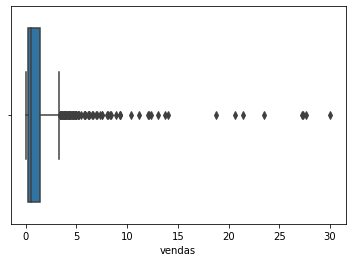

In [60]:
sns.boxplot(x=df_novo['vendas'])

### Boxplot de vendas após a retirada dos outliers

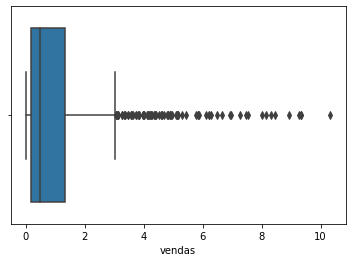

In [61]:
sns.boxplot(x=df_novo_limpo['vendas'])

## Normalização

Para essa etapa, escolhemos as colunas de vendas e as 4 de avaliações e vamos normaliza-las usando o método MinMax.

In [72]:
sub = df_novo_limpo.dropna()[ [ "vendas", "avaliacao_criticos_novo","numero_criticos_novo","avaliacao_usuarios_novo","numero_usuarios_novo" ] ]
print(sub)

     vendas  avaliacao_criticos_novo  numero_criticos_novo  \
0      2.80                79.891156                 147.0   
1      0.37                71.406593                  91.0   
4      0.97                75.000000                  26.0   
5      0.20                63.000000                  12.0   
6      0.01                73.000000                  30.0   
..      ...                      ...                   ...   
833    0.63                77.000000                  70.0   
835    0.94                82.000000                  48.0   
836    0.43                76.112903                 124.0   
837    3.98                77.631068                 103.0   
838    0.01                54.000000                   5.0   

     avaliacao_usuarios_novo  numero_usuarios_novo  
0                   7.913084                 107.0  
1                   6.777778                  99.0  
4                   8.500000                  27.0  
5                   6.100000               

In [73]:
scaler = preprocessing.MinMaxScaler()
normalizados = pd.DataFrame( scaler.fit_transform(sub), columns=sub.columns )
print(normalizados)
print(normalizados.min())
print(normalizados.max())

       vendas  avaliacao_criticos_novo  numero_criticos_novo  \
0    0.270349                 0.801867              0.826590   
1    0.034884                 0.692529              0.502890   
2    0.093023                 0.738836              0.127168   
3    0.018411                 0.584196              0.046243   
4    0.000000                 0.713063              0.150289   
..        ...                      ...                   ...   
620  0.060078                 0.764610              0.381503   
621  0.090116                 0.829043              0.254335   
622  0.040698                 0.753178              0.693642   
623  0.384690                 0.772742              0.572254   
624  0.000000                 0.468216              0.005780   

     avaliacao_usuarios_novo  numero_usuarios_novo  
0                   0.807472              0.035286  
1                   0.669734              0.032545  
2                   0.878678              0.007879  
3                  